# Analysis of Samples

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import S2P_Tools as s2p

In [61]:
d = 0.0127
c=299792458

In [62]:
def calculate45(No_Sample_file, Sample_file_start, Sample_list,Sample_file_end, d):
    frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(No_Sample_file)

    
    for sample in list(Sample_list):
        mu_r_list = []
        epsilon_r_list = []
        current_list = []
        
        for i in range(0,6):
            frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(Sample_file_start+str(sample)+"_"+str(i*5)+Sample_file_end)
    
            # Subtract 360 from the values that meet the condition
            s11_phase[s11_phase > 0] -= 360
            s11_phase = s11_phase - s11_phase_h
            s21_phase = s21_phase - s21_phase_h

            # Phase correction
            lambda_0 = c / frequency
            phi_0 = 360 * d/lambda_0
            s21_phase = s21_phase - phi_0
            s11_phase = s11_phase - phi_0

            # 45 degree correction
            s11_phase  = s11_phase - 45

            s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
            s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

            # Calculate epsilon and mu
            K = (s11**2-s21**2+1)/(2*s11)

            R = np.zeros_like(K)
            mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
            R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
            R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

            T = (s11+s21-R)/(1-(s11+s21)*R)
            lambda_0 = c / frequency
            A = -((1/(2*np.pi*d)) * np.log(1/T))**2

            # Zero cut-off wavelength
            mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
            epsilon_r = (lambda_0**2 / mu_r ) * (A)
    
            mu_r_list.append(np.average(mu_r))
            epsilon_r_list.append(np.average(epsilon_r))
            current_list.append(i*5)
        plt.plot(current_list, np.real(mu_r_list), label='$\mathbb{R}(\mu)$ N='+str(sample))
        plt.plot(current_list, np.abs(np.imag(mu_r_list)), label='$\mathbb{I}(\mu)$ N='+str(sample))
        plt.plot(current_list, np.real(epsilon_r_list), label='$\mathbb{R}(\epsilon)$ N='+str(sample))
        plt.plot(current_list, np.imag(epsilon_r_list), label='$\mathbb{I}(\epsilon)$ N='+str(sample))
    
    plt.title('Relative Permittivity and Permeability vs Current')
    plt.xlabel('Current (A)')
    plt.ylabel('Relative Permittivity and Permeability')
    plt.legend()
    plt.grid()
    plt.show()

#### L74087BAN1

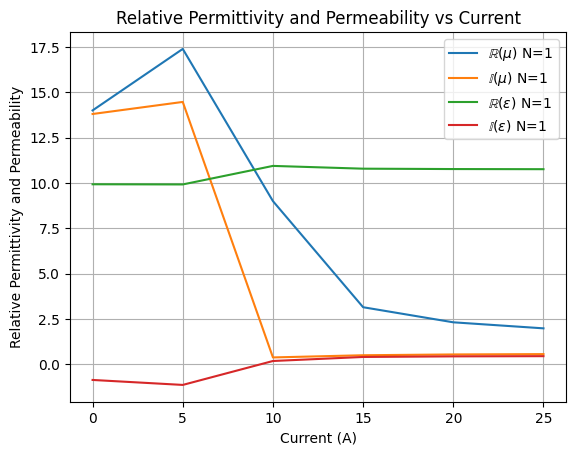

In [63]:
calculate45(r'07102023_Sample_Meas\NO_SAMPLE_0A_AVG_AFTERSET1.S2P',r'07102023_Sample_Meas\L74087BAN',[1],r'A_AVG.S2P',d)

#### L74504BBN1

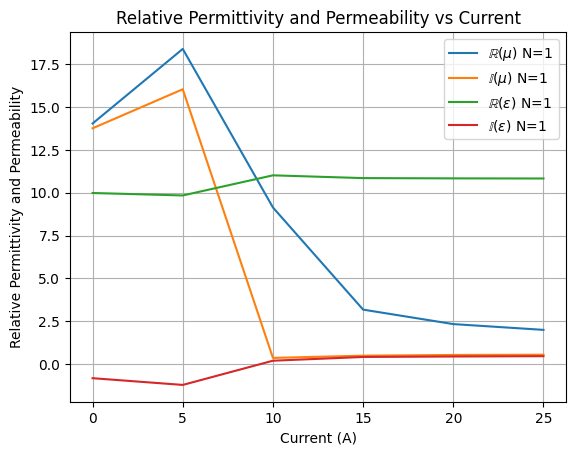

In [64]:
calculate45(r'07102023_Sample_Meas\NO_SAMPLE_0A_AVG_AFTERSET1.S2P',r'07102023_Sample_Meas\L74504BBN',[1],r'A_AVG.S2P',d)

#### L76583BCN1

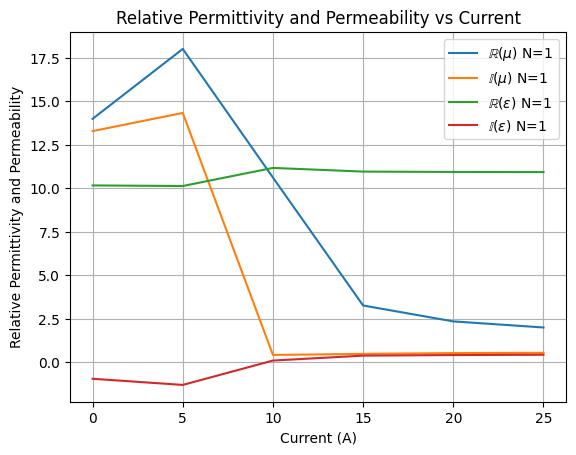

In [65]:
calculate45(r'07102023_Sample_Meas\NO_SAMPLE_0A_AVG_AFTERSET1.S2P',r'07102023_Sample_Meas\L76583BCN',[1],r'A_AVG.S2P',d)

#### Losses

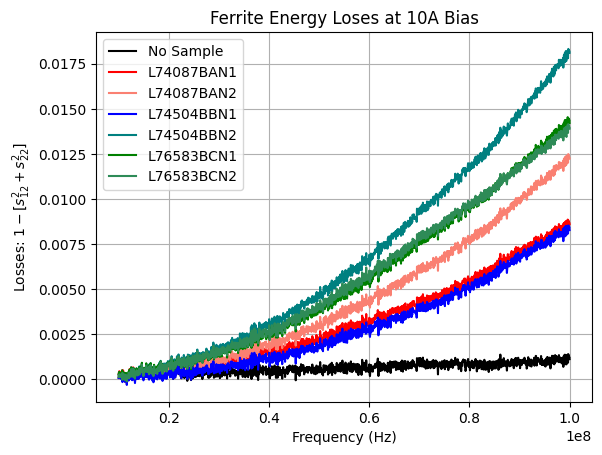

In [76]:
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\NO_SAMPLE_0A_AVG_AFTERSET1.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='No Sample', color='black')

frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\L74087BAN1_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74087BAN1', color='red')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\L74087BAN2_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74087BAN2', color='salmon')

frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\L74504BBN1_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74504BBN1', color='blue')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\L74504BBN2_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74504BBN2', color='teal')


frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\L76583BCN1_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L76583BCN1', color='green')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\L76583BCN2_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L76583BCN2', color='seagreen')

frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07102023_Sample_Meas\MACOR_SAMPLE_0A_AVG.S2P')
#plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='Macor 0A', color='orange')


plt.title("Ferrite Energy Loses at 10A Bias")
plt.legend()
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Losses: $1-[s_{12}^2+s_{22}^2]$')

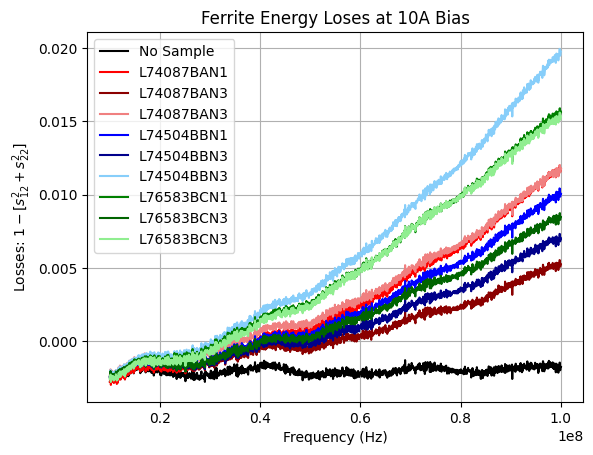

In [73]:
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\NO_SAMPLE_0A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='No Sample', color='black')

frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74087BAN1_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74087BAN1', color='red')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74087BAN3_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74087BAN3', color='darkred')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74087BAN4_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74087BAN3', color='lightcoral')

frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74504BBN1_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74504BBN1', color='blue')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74504BBN3_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74504BBN3', color='darkblue')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74504BBN4_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L74504BBN3', color='lightskyblue')


frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L76583BCN1_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L76583BCN1', color='green')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L76583BCN3_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L76583BCN3', color='darkgreen')
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L76583BCN4_10A_AVG.S2P')
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2),label='L76583BCN3', color='lightgreen')

plt.title("Ferrite Energy Loses at 10A Bias")
plt.legend()
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Losses: $1-[s_{12}^2+s_{22}^2]$')

plt.savefig("Loses2.png")